In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf


In [2]:
df=pd.read_csv("D:/data sets/delivery_time.csv")


In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
#Correlation
df.corr

<bound method DataFrame.corr of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

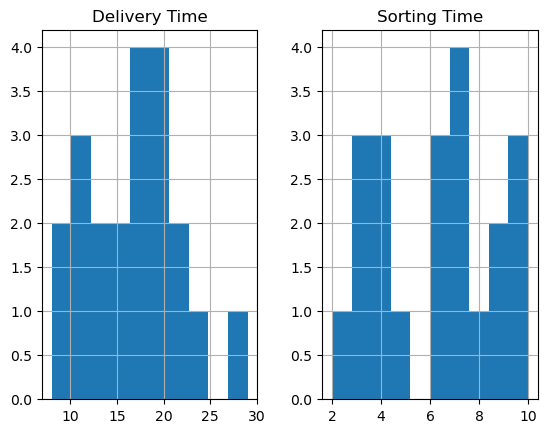

In [6]:
df.hist()

In [7]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


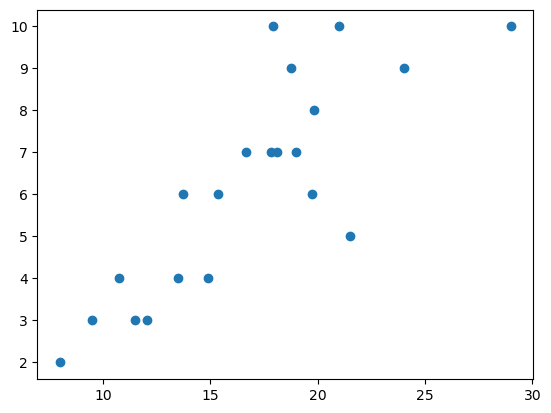

In [8]:
x = df.delivery_time
y = df.sorting_time
plt.scatter(x,y)
plt.xlabel=("delivery_time")
plt.ylabel=("sorting_time")


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

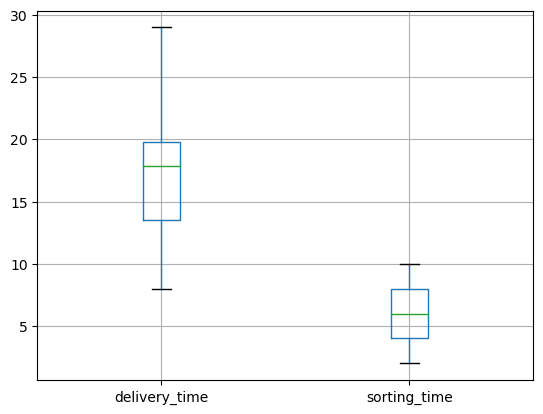

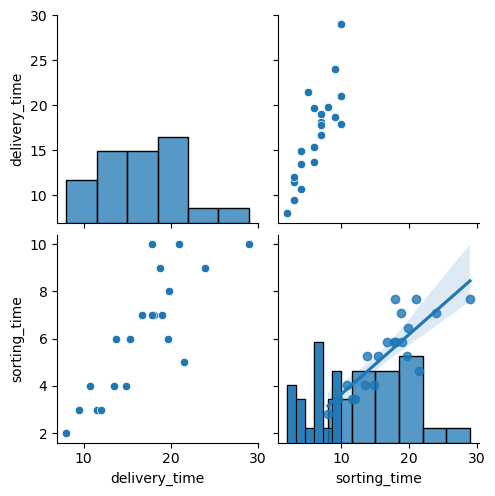

In [10]:
df.boxplot()
sns.pairplot(df)
sns.histplot(df['delivery_time'])
sns.histplot(df['sorting_time'])
sns.regplot(x='delivery_time', y='sorting_time', data=df)


In [11]:
model=smf.ols("sorting_time~delivery_time ", data=df).fit()

In [12]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        12:17:03   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [14]:
print(model.tvalues,'\n' ,model.pvalues)

Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [16]:
#Transformation models
model2 = smf.ols("np.log(sorting_time)~delivery_time", data=df).fit() 
model2.params
model2.summary()  
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [17]:
model3 = smf.ols("np.sqrt(sorting_time)~delivery_time", data=df).fit() 
model3.params
model3.summary()
(model3.rsquared,model3.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [18]:
#Prediction
newdata=pd.Series([10,5])
data_pred=pd.DataFrame(newdata, columns=['delivery_time'])
data_pred
model3.predict(data_pred)

0    1.837641
1    1.399287
dtype: float64

In [19]:
# #Inference

# Hence, np.sqrt transforfation model is suitable accuracy for the data.
